<ipython-input-1-b0abd26b0d49>:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq, abs(X), 'b', \
<ipython-input-1-b0abd26b0d49>:62: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(freq, abs(Y), 'b', \


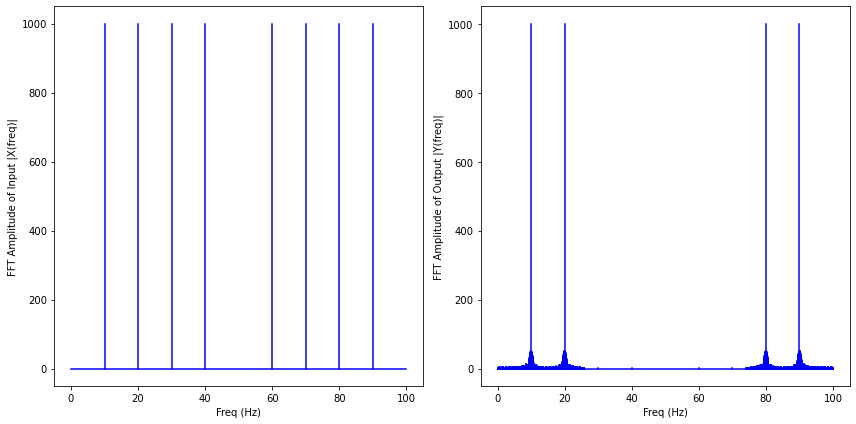

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

def sinc_filter(M, fc):
	"""Return an M + 1 point symmetric point sinc kernel with normalised cut-off 
    		frequency fc 0->0.5."""
	if M%2:
		raise Exception('M must be odd')
	return np.sinc(2*fc*(np.arange(M + 1) - M/2))

def hamming(M):
	"""Return an M + 1 point symmetric hamming window."""
	if M%2:
		raise Exception('M must be odd')
	return 0.54 - 0.46*np.cos(2*np.pi*np.arange(M + 1)/M)

def build_filter(M, fc, window=None):
	"""Construct filter using the windowing method for filter parameters M
	number of taps, cut-off frequency fc and window. Window defaults to None 
	i.e. a rectangular window."""
	if window is None:
		h = sinc_filter(M, fc)
	else:
		h = sinc_filter(M, fc)*window(M)
	return h/h.sum()

f0 = 20 #20Hz
ts = 0.01 # i.e. sampling frequency is 1/ts = 100Hz
sr = 1/ts
x = np.arange(-10, 10, ts)
signal = (np.cos(2*np.pi*f0*x) + np.sin(2*np.pi*2*f0*x) + 
                np.cos(2*np.pi*0.5*f0*x) + np.cos(2*np.pi*1.5*f0*x))

#build up some filters
#Low pass
M = 100 #number of taps in filter
fc = 0.25 #i.e. normalised cutoff frequency 1/4 of sampling rate i.e. 25Hz
ham_lp = build_filter(M, fc, window=hamming)
y_ham = np.convolve(signal, ham_lp)

X = fft(signal)
Nx = len(X)
n = np.arange(Nx)
T = Nx/sr
freq = n/T 

plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude of Input |X(freq)|')

Y=fft(y_ham)
Ny = len(Y)
n = np.arange(Ny)
T = Ny/sr
freq = n/T 

plt.subplot(122)
plt.stem(freq, abs(Y), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude of Output |Y(freq)|')
plt.tight_layout()
plt.show()
